In [1]:
import pandas as pd
low_memory=False
%matplotlib inline
pd.options.display.max_columns= 10
pd.options.display.max_rows=5

In [2]:
#Importar o arquvi .csv 2018
filename2018 = 'DM_DOCENTE_2018.CSV'
df2018 = pd.read_csv(filename2018, sep='|', error_bad_lines=False, encoding='latin-1')
print(df2018.columns)

Index(['NU_ANO_CENSO', 'CO_IES', 'TP_CATEGORIA_ADMINISTRATIVA',
       'TP_ORGANIZACAO_ACADEMICA', 'CO_DOCENTE_IES', 'ID_DOCENTE',
       'TP_SITUACAO', 'TP_ESCOLARIDADE', 'TP_REGIME_TRABALHO', 'TP_SEXO',
       'NU_ANO_NASCIMENTO', 'NU_MES_NASCIMENTO', 'NU_DIA_NASCIMENTO',
       'NU_IDADE', 'TP_COR_RACA', 'CO_PAIS_ORIGEM', 'TP_NACIONALIDADE',
       'CO_UF_NASCIMENTO', 'CO_MUNICIPIO_NASCIMENTO', 'IN_DEFICIENCIA',
       'IN_DEFICIENCIA_CEGUEIRA', 'IN_DEFICIENCIA_BAIXA_VISAO',
       'IN_DEFICIENCIA_SURDEZ', 'IN_DEFICIENCIA_AUDITIVA',
       'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_SURDOCEGUEIRA',
       'IN_DEFICIENCIA_MULTIPLA', 'IN_DEFICIENCIA_INTELECTUAL',
       'IN_ATUACAO_EAD', 'IN_ATUACAO_EXTENSAO', 'IN_ATUACAO_GESTAO',
       'IN_ATUACAO_GRAD_PRESENCIAL', 'IN_ATUACAO_POS_EAD',
       'IN_ATUACAO_POS_PRESENCIAL', 'IN_ATUACAO_SEQUENCIAL',
       'IN_ATUACAO_PESQUISA', 'IN_BOLSA_PESQUISA', 'IN_SUBSTITUTO',
       'IN_EXERCICIO_DATA_REFERENCIA', 'IN_VISITANTE',
       'TP_VISITAN

In [3]:
#Nome das colunas
df2018=df2018.drop(columns=['NU_ANO_CENSO', 'CO_IES', 
       'TP_ORGANIZACAO_ACADEMICA', 'CO_DOCENTE_IES', 'ID_DOCENTE',
       'TP_SITUACAO', 'TP_REGIME_TRABALHO', 'NU_ANO_NASCIMENTO', 'NU_MES_NASCIMENTO', 'NU_DIA_NASCIMENTO',
       'CO_PAIS_ORIGEM', 'TP_NACIONALIDADE',
       'CO_UF_NASCIMENTO', 'CO_MUNICIPIO_NASCIMENTO', 'IN_DEFICIENCIA',
       'IN_DEFICIENCIA_CEGUEIRA', 'IN_DEFICIENCIA_BAIXA_VISAO',
       'IN_DEFICIENCIA_SURDEZ', 'IN_DEFICIENCIA_AUDITIVA',
       'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_SURDOCEGUEIRA',
       'IN_DEFICIENCIA_MULTIPLA', 'IN_DEFICIENCIA_INTELECTUAL',
       'IN_ATUACAO_EAD', 'IN_ATUACAO_EXTENSAO', 'IN_ATUACAO_GESTAO',
       'IN_ATUACAO_GRAD_PRESENCIAL', 'IN_ATUACAO_POS_EAD',
       'IN_ATUACAO_POS_PRESENCIAL', 'IN_ATUACAO_SEQUENCIAL',
       'IN_ATUACAO_PESQUISA', 'IN_BOLSA_PESQUISA', 'IN_SUBSTITUTO',
       'IN_EXERCICIO_DATA_REFERENCIA', 'IN_VISITANTE',
       'TP_VISITANTE_IFES_VINCULO'], axis=1)

In [4]:
#Mudar nome das colunas
df2018=df2018.rename(columns={'TP_CATEGORIA_ADMINISTRATIVA': 'Categoria_Administrativa', 'TP_ESCOLARIDADE':'Escolaridade', 'TP_SEXO':'Genero', 'NU_IDADE':'Idade', 'TP_COR_RACA':'Cor'})

In [5]:
df2018

,Categoria_Administrativa,Escolaridade,Genero,Idade,Cor
0,1,5,2,61,3
1,1,5,2,66,3
...,...,...,...,...,...
397891,2,5,2,63,0
397892,2,4,2,49,0


In [6]:
#CSV 2012
filename2012 = 'DM_DOCENTENOVO_2012.CSV'
df2012 = pd.read_csv(filename2012, sep=',', error_bad_lines=False, encoding='latin-1')
df2012

,Categoria_Administrativa,Escolaridade,Genero,Idade,Cor
0,1,2,0,28,6
1,1,3,1,27,6
...,...,...,...,...,...
378937,5,5,1,46,1
378938,4,5,1,46,1


In [7]:
#CSV 2015
filename2015 = 'DM_DOCENTENOVO_2015.CSV'
df2015 = pd.read_csv(filename2012, sep=',', error_bad_lines=False, encoding='latin-1')
df2015

,Categoria_Administrativa,Escolaridade,Genero,Idade,Cor
0,1,2,0,28,6
1,1,3,1,27,6
...,...,...,...,...,...
378937,5,5,1,46,1
378938,4,5,1,46,1


In [23]:
#Separação dos dados por gênero



masc_gen_1 = df2012[df2012.Genero == 0].values.tolist()
fem_gen_2 = df2012[df2012.Genero == 1].values.tolist()
masc_gen_3 = df2015[df2015.Genero == 0].values.tolist()
fem_gen_4 = df2015[df2015.Genero == 1].values.tolist()
masc_gen_5 = df2018[df2018.Genero == 2].values.tolist()
fem_gen_6 = df2018[df2018.Genero == 1].values.tolist()




gen_masc = [len(masc_gen_1),len(masc_gen_3),len(masc_gen_5)]
gen_fem = [len(fem_gen_2),len(fem_gen_4),len(fem_gen_6)]

gen_fem

[171597, 171597, 184079]

In [24]:
df_gen = pd.DataFrame({'Masculino': gen_masc, 'Feminino': gen_fem}, 
                      index=['2012','2015','2018'])
df_gen

,Masculino,Feminino
2012,207342,171597
2015,207342,171597
2018,213814,184079


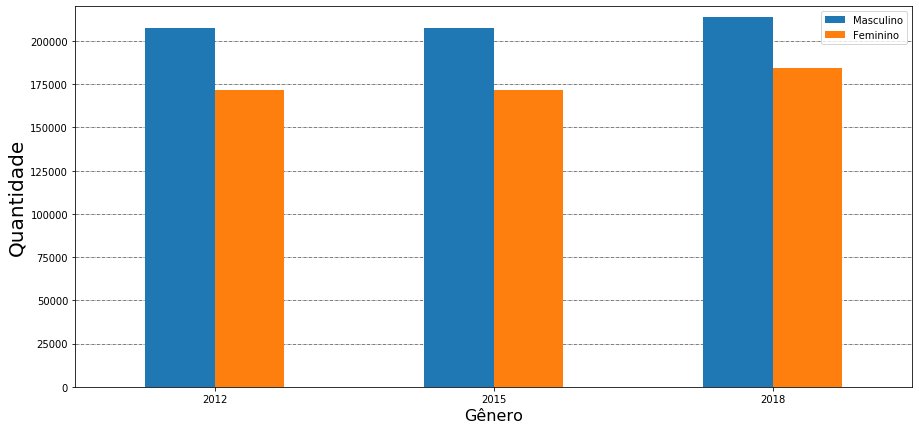

In [32]:
ax = df_gen.plot.bar(rot=0, figsize=(15,7))
ax.set_xlabel('Gênero',fontsize=16)
ax.set_ylabel('Quantidade',fontsize=20)
ax.set_ylim(0, 220000)
ax.grid(linestyle='-.', linewidth='0.5', color='black')
ax.xaxis.grid()
ax.set_axisbelow(True)

In [11]:
#OFerta de Docentes por Categoria Administrativa
df2012_adm_1 = df2012[df2012.Categoria_Administrativa == 1].values.tolist()
df2012_adm_2 = df2012[df2012.Categoria_Administrativa == 2].values.tolist()
df2012_adm_3 = df2012[df2012.Categoria_Administrativa == 3].values.tolist()
df2012_adm_4 = df2012[df2012.Categoria_Administrativa == 4].values.tolist()
df2012_adm_5 = df2012[df2012.Categoria_Administrativa == 5].values.tolist()
df2012_adm_6 = df2012[df2012.Categoria_Administrativa == 6].values.tolist()

df2015_adm_1 = df2015[df2015.Categoria_Administrativa == 1].values.tolist()
df2015_adm_2 = df2015[df2015.Categoria_Administrativa == 2].values.tolist()
df2015_adm_3 = df2015[df2015.Categoria_Administrativa == 3].values.tolist()
df2015_adm_4 = df2015[df2015.Categoria_Administrativa == 4].values.tolist()
df2015_adm_5 = df2015[df2015.Categoria_Administrativa == 5].values.tolist()
df2015_adm_7 = df2015[df2015.Categoria_Administrativa == 7].values.tolist()

df2018_adm_1 = df2018[df2018.Categoria_Administrativa == 1].values.tolist()
df2018_adm_2 = df2018[df2018.Categoria_Administrativa == 2].values.tolist()
df2018_adm_3 = df2018[df2018.Categoria_Administrativa == 3].values.tolist()
df2018_adm_4 = df2018[df2018.Categoria_Administrativa == 4].values.tolist()
df2018_adm_5 = df2018[df2018.Categoria_Administrativa == 5].values.tolist()
df2018_adm_7 = df2018[df2018.Categoria_Administrativa == 7].values.tolist()


adm_fed= [len(df2012_adm_1),len(df2015_adm_1),len(df2018_adm_1)]
adm_est= [len(df2012_adm_2),len(df2015_adm_2),len(df2018_adm_2)]
adm_mun= [len(df2012_adm_3),len(df2015_adm_3),len(df2018_adm_3)]
adm_pri= [len(df2012_adm_4)+len(df2012_adm_5),len(df2015_adm_4)+len(df2015_adm_5),len(df2018_adm_4)+len(df2018_adm_5)]
adm_esp= [len(df2012_adm_6),len(df2015_adm_7),len(df2018_adm_7)]


adm_fed

[95615, 95615, 123761]

In [12]:
df_adm = pd.DataFrame({'Federal': adm_fed, 'Estadual': adm_est, 'Municipal':adm_mun, 'Privada':adm_pri, 'Especial':adm_esp }, 
                      index=['2012','2015','2018'])
df_adm

,Federal,Estadual,Municipal,Privada,Especial
2012,95615,52494,4337,218565,7928
2015,95615,52494,4337,218565,0
2018,123761,53182,4768,214224,1958


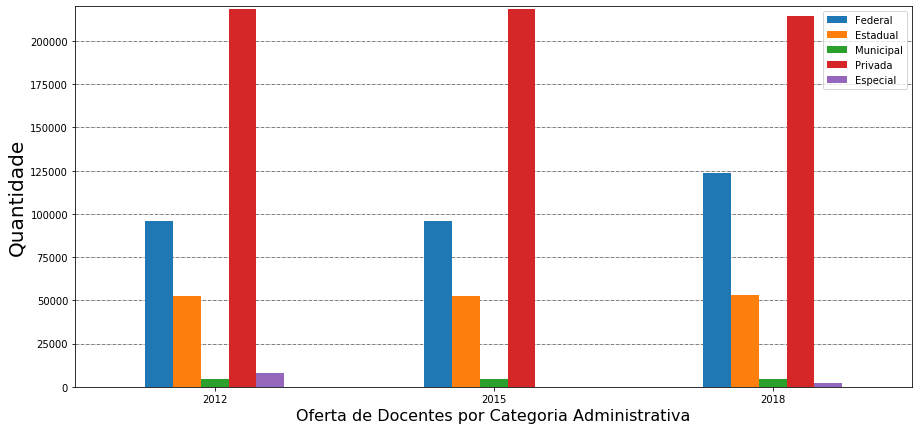

In [13]:
ax = df_adm.plot.bar(rot=0,figsize=(15,7))
ax.set_xlabel('Oferta de Docentes por Categoria Administrativa',fontsize=16)
ax.set_ylabel('Quantidade',fontsize=20)
ax.set_ylim(0, 220000)
ax.grid(linestyle='-.', linewidth='0.5', color='black')
ax.xaxis.grid()
ax.set_axisbelow(True)

In [14]:
#Número de docentes por Escolaridade
df2012_esc_1 = df2012[df2012.Escolaridade == 1].values.tolist()
df2012_esc_2 = df2012[df2012.Escolaridade == 2].values.tolist()
df2012_esc_3 = df2012[df2012.Escolaridade == 3].values.tolist()
df2012_esc_4 = df2012[df2012.Escolaridade == 4].values.tolist()
df2012_esc_5 = df2012[df2012.Escolaridade == 5].values.tolist()


df2015_esc_1 = df2015[df2015.Escolaridade == 1].values.tolist()
df2015_esc_2 = df2015[df2015.Escolaridade == 2].values.tolist()
df2015_esc_3 = df2015[df2015.Escolaridade == 3].values.tolist()
df2015_esc_4 = df2015[df2015.Escolaridade == 4].values.tolist()
df2015_esc_5 = df2015[df2015.Escolaridade == 5].values.tolist()

df2018_esc_1 = df2018[df2018.Escolaridade == 1].values.tolist()
df2018_esc_2 = df2018[df2018.Escolaridade == 2].values.tolist()
df2018_esc_3 = df2018[df2018.Escolaridade == 3].values.tolist()
df2018_esc_4 = df2018[df2018.Escolaridade == 4].values.tolist()
df2018_esc_5 = df2018[df2018.Escolaridade == 5].values.tolist()

esc_1= [len(df2012_esc_1),len(df2015_esc_1),len(df2018_esc_1)]
esc_2= [len(df2012_esc_2),len(df2015_esc_2),len(df2018_esc_2)]
esc_3= [len(df2012_esc_3),len(df2015_esc_3),len(df2018_esc_3)]
esc_4= [len(df2012_esc_4),len(df2015_esc_4),len(df2018_esc_4)]
esc_5= [len(df2012_esc_5),len(df2015_esc_5),len(df2018_esc_5)]


esc_3

[100138, 100138, 66741]

In [15]:
df_esc = pd.DataFrame({'Sem Graduação': esc_1, 'Graduação': esc_2, 'Especialização':esc_3, 'Mestrado':esc_4, 'Doutorado':esc_5 }, 
                      index=['2012','2015','2018'])
df_esc

,Sem Graduação,Graduação,Especialização,Mestrado,Doutorado
2012,107,12161,100138,147876,118657
2015,107,12161,100138,147876,118657
2018,20,3982,66741,156182,170968


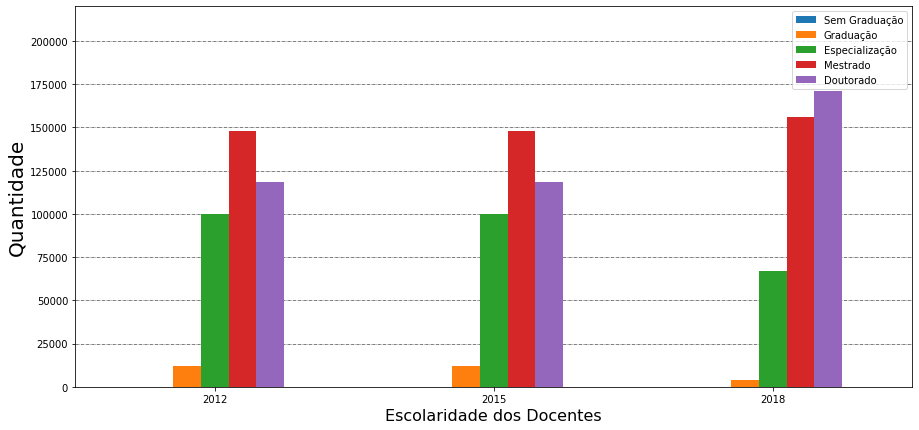

In [16]:
ax = df_esc.plot.bar(rot=0,figsize=(15,7))
ax.set_xlabel('Escolaridade dos Docentes',fontsize=16)
ax.set_ylabel('Quantidade',fontsize=20)
ax.set_ylim(0, 220000)
ax.grid(linestyle='-.', linewidth='0.5', color='black')
ax.xaxis.grid()
ax.set_axisbelow(True)

In [17]:
#Número de docentes por Cor
df2012_cor_1 = df2012[df2012.Cor == 1].values.tolist()
df2012_cor_2 = df2012[df2012.Cor == 2].values.tolist()
df2012_cor_3 = df2012[df2012.Cor == 3].values.tolist()
df2012_cor_4 = df2012[df2012.Cor == 4].values.tolist()
df2012_cor_5 = df2012[df2012.Cor == 5].values.tolist()
df2012_cor_6 = df2012[df2012.Cor == 6].values.tolist()
df2012_cor_7 = df2012[df2012.Cor == 0].values.tolist()

df2015_cor_1 = df2015[df2015.Cor == 1].values.tolist()
df2015_cor_2 = df2015[df2015.Cor == 2].values.tolist()
df2015_cor_3 = df2015[df2015.Cor == 3].values.tolist()
df2015_cor_4 = df2015[df2015.Cor == 4].values.tolist()
df2015_cor_5 = df2015[df2015.Cor == 5].values.tolist()
df2015_cor_6 = df2015[df2015.Cor == 6].values.tolist()
df2015_cor_7 = df2015[df2015.Cor == 0].values.tolist()


df2018_cor_1 = df2018[df2018.Cor == 1].values.tolist()
df2018_cor_2 = df2018[df2018.Cor == 2].values.tolist()
df2018_cor_3 = df2018[df2018.Cor == 3].values.tolist()
df2018_cor_4 = df2018[df2018.Cor == 4].values.tolist()
df2018_cor_5 = df2018[df2018.Cor == 5].values.tolist()
df2018_cor_6 = df2018[df2018.Cor == 9].values.tolist()
df2018_cor_7 = df2018[df2018.Cor == 0].values.tolist()


cor_1= [len(df2012_cor_1),len(df2015_cor_1),len(df2018_cor_1)]
cor_2_3= [len(df2012_cor_2)+len(df2012_cor_3),len(df2015_cor_2)+len(df2015_cor_3),len(df2018_cor_2)+len(df2018_cor_3)]
cor_4= [len(df2012_cor_4),len(df2015_cor_4),len(df2018_cor_4)]
cor_5= [len(df2012_cor_5),len(df2015_cor_5),len(df2018_cor_5)]
cor_6_7= [len(df2012_cor_6)+len(df2012_cor_7),len(df2015_cor_6)+len(df2012_cor_7),len(df2018_cor_6)+len(df2012_cor_7)]

cor_1

[180052, 180052, 210430]

In [18]:
df_cor = pd.DataFrame({'Branca': cor_1, 'Preta e Parda': cor_2_3, 'Amarela':cor_4, 'Indígena':cor_5, 'Não dispoem ou não quis declarar':cor_6_7, }, 
                      index=['2012','2015','2018'])
df_cor

,Branca,Preta e Parda,Amarela,Indígena,Não dispoem ou não quis declarar
2012,180052,50145,2927,377,145438
2015,180052,50145,2927,377,145438
2018,210430,65249,3883,499,82152


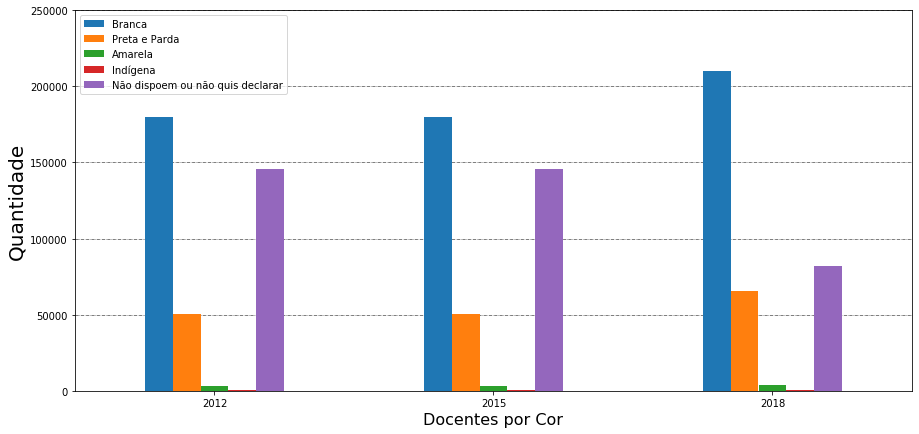

In [19]:
ax = df_cor.plot.bar(rot=0,figsize=(15,7))
ax.set_xlabel('Docentes por Cor',fontsize=16)
ax.set_ylabel('Quantidade',fontsize=20)
ax.set_ylim(0, 250000)
ax.grid(linestyle='-.', linewidth='0.5', color='black')
ax.xaxis.grid()
ax.set_axisbelow(True)

In [20]:
#Idade dos Docentes
df2012_idade_1 = df2012[df2012.Idade <=30].values.tolist() #de 19 a 30
df2012_idade_2 = df2012[df2012.Idade <=40].values.tolist() #de 31 a 40
df2012_idade_3 = df2012[df2012.Idade <=50].values.tolist() #de 41 a 50
df2012_idade_4 = df2012[df2012.Idade <=60].values.tolist() #de 51 a 60
df2012_idade_5 = df2012[df2012.Idade >=61].values.tolist() #>61

df2015_idade_1 = df2015[df2015.Idade <=30].values.tolist() #de 19 a 30
df2015_idade_2 = df2015[df2015.Idade <=40].values.tolist() #de 31 a 40
df2015_idade_3 = df2015[df2015.Idade <=50].values.tolist() #de 41 a 50
df2015_idade_4 = df2015[df2015.Idade <=60].values.tolist() #de 51 a 60
df2015_idade_5 = df2015[df2015.Idade >=61].values.tolist() #>61

df2018_idade_1 = df2018[df2018.Idade <=30].values.tolist() #de 19 a 30
df2018_idade_2 = df2018[df2018.Idade <=40].values.tolist() #de 31 a 40
df2018_idade_3 = df2018[df2018.Idade <=50].values.tolist() #de 41 a 50
df2018_idade_4 = df2018[df2018.Idade <=60].values.tolist() #de 51 a 60
df2018_idade_5 = df2018[df2018.Idade >=61].values.tolist() #>61


idade_1 = [len(df2012_idade_1),len(df2015_idade_1),len(df2018_idade_1)]
idade_2 = [len(df2012_idade_2)-len(df2012_idade_1),len(df2015_idade_2)-len(df2015_idade_1),len(df2018_idade_2)-len(df2018_idade_1)]
idade_3 = [len(df2012_idade_3)-len(df2012_idade_2),len(df2015_idade_3)-len(df2015_idade_2),len(df2018_idade_3)-len(df2018_idade_2)]
idade_4 = [len(df2012_idade_4)-len(df2012_idade_3),len(df2015_idade_4)-len(df2015_idade_3),len(df2018_idade_4)-len(df2018_idade_3)]
idade_5 = [len(df2012_idade_5),len(df2015_idade_5),len(df2018_idade_5)]


In [21]:
df_idade = pd.DataFrame({'19 a 30 anos':idade_1,'31 a 40 anos':idade_2,'41 a 50 anos':idade_3,'51 a 60 anos':idade_4,'> 61 anos':idade_5}, index=['2012','2015','2018'])
df_idade

,19 a 30 anos,31 a 40 anos,41 a 50 anos,51 a 60 anos,> 61 anos
2012,39872,129862,109204,70064,29937
2015,39872,129862,109204,70064,29937
2018,30551,134858,114402,80291,37791


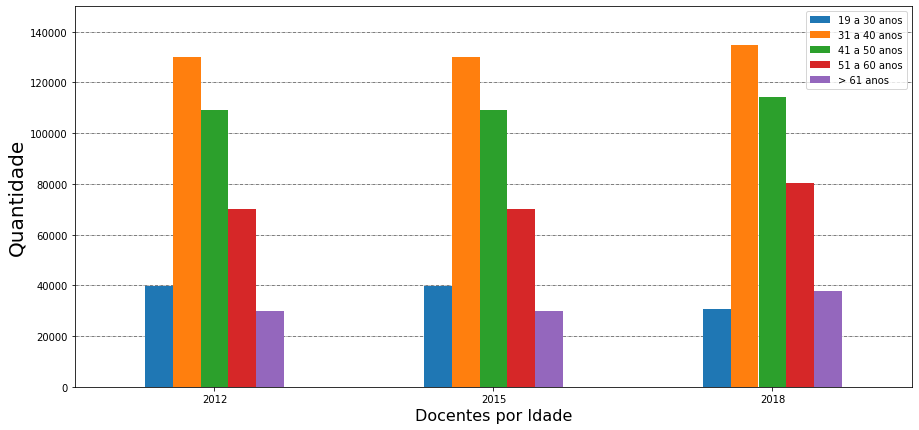

In [22]:
ax = df_idade.plot.bar(rot=0,figsize=(15,7))
ax.set_xlabel('Docentes por Idade',fontsize=16)
ax.set_ylabel('Quantidade',fontsize=20)
ax.set_ylim(0, 150000)
ax.grid(linestyle='-.', linewidth='0.5', color='black')
ax.xaxis.grid()
ax.set_axisbelow(True)